# `AITutor-AssessmentKit` Demo  

Welcome to the `AITutor-AssessmentKit`! With the remarkable advancements in large language models (LLMs), there is growing interest in leveraging these models as AI-powered tutors. However, the field lacks robust evaluation methodologies and tools to systematically assess the pedagogical capabilities of such systems. The `AITutor-AssessmentKit` is the first open-source toolkit specifically designed to evaluate the pedagogical performance of AI tutors in *Student Mistake Remediation* tasks.   

- **Evaluation Across 8 Pedagogical Dimensions:** Based on the learning principles proposed by Maurya et al. (2024), the toolkit evaluates tutor performance across the following core dimensions:  
  1. *Mistake Identification*  
  2. *Mistake Location*  
  3. *Revealing the Answer*  
  4. *Providing Guidance*  
  5. *Actionability*  
  6. *Coherence*  
  7. *Tutor Tone*  
  8. *Human-likeness*  

- **Developed with Public Models and Powerful LLMs:** The toolkit integrates appropriate publicly available models released by the NLP community and LLMs for each dimension to assess pedagogical abilities.  
 



## `AITutor-AssessmentKit` for Student Mistake Remediation Task

![](/home/kaushal.maurya/AITutor_AssessmentKit/outputs/toolkit_poster.jpeg)





## **Overview of the `AITutor-AssessmentKit`**

Three modules:  
1. `AutoEval` - Automated evaluation for each dimension.  
2. `LLMEval` - LLM-based evaluation for each dimension.  
3. `Visualizer` - Visualizes and compares human evaluation scores, automated evaluation scores, and LLM evaluation scores.

![](/home/kaushal.maurya/AITutor_AssessmentKit/outputs/AITutor-assessmentKit-Main_vf3.png)

## **Installation**

Let's install the `AITutor-AssessmentKit` with `pip`

In [1]:
# !pip install AITutor-AssessmentKit

In [2]:
import os
import sys
import pandas as pd
import json

# Set the CUDA device for execution
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# Add the parent directory to the system path
sys.path.insert(0, os.path.abspath(".."))

In [3]:
# Import related to `AutoEval` module
from aitutor_assessmentkit.autoevaluator import (
    AutoMistakeIdentificationEvaluator,
    AutoMistakeLocationEvaluator,
    AutoRevealingOfTheAnswerEvaluator,
    AutoProvidingGuidanceEvaluator,
    AutoActionabilityEvaluator,
    AutoCoherenceEvaluator, 
    AutoTutorToneEvaluator,
    AutoHumanlikenessEvaluator, 
    AutoEvaluationReport,
)

# Import related to `LLMEval` module
from aitutor_assessmentkit.llmevaluator import LLMEvaluator

# Import related to `Visualizer` module
from aitutor_assessmentkit.visualizer import Visualizer

# helper imports 
from aitutor_assessmentkit.helpers import utils

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


WARNING 12-15 23:33:20 cuda.py:22] You are using a deprecated `pynvml` package. Please install `nvidia-ml-py` instead, and make sure to uninstall `pynvml`. When both of them are installed, `pynvml` will take precedence and cause errors. See https://pypi.org/project/pynvml for more information.


## **Data: `MRBench`**
Let's download the `MRBench` dataset from Maurya et al. (2024)

In [4]:
utils.load_data('/home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json')

,conversation_id,conversation_history,Data,Split,Topic,Ground_Truth_Solution,anno_llm_responses
0,930-b01cb51d-748d-460c-841a-08e4d5cd5cc7,"Tutor: Hi, could you please provide a step-by-...",MathDial,test,Not Available,Elliott took half of his steps on his school j...,{'Gemini': {'response': 'It looks like you're ...
1,3711-05b6ce71-9710-4b83-8ad2-e207d306c73e,"Tutor: Hi, could you please provide a step-by-...",MathDial,test,Not Available,There are a total of 26 - 2 = 24 pencils in th...,{'Sonnet': {'response': 'I appreciate your eff...
2,2895106109,"Tutor: Examples: triangles, rectangles and pen...",Bridge,train,4.5A.Geometric Lines,Not Available,"{'Llama31405B': {'response': 'That's close, bu..."
3,232-a53cdc95-d429-4503-95b8-a22ddec0a735,"Tutor: Hi, could you please provide a step-by-...",MathDial,test,Not Available,There are a total of 26 - 2 = 24 pencils in th...,{'Llama31405B': {'response': 'Let's re-examine...
4,4211-015f58b6-1408-417d-aa60-2a069b1a8806,"Tutor: Hi, could you please provide a step-by-...",MathDial,test,Not Available,She got 5 gift cards because 50 / 10 = 5\nShe ...,{'Expert': {'response': 'Ok. And if she got 5 ...
...,...,...,...,...,...,...,...
195,2822-2a69004c-035b-49b7-aab9-f2ab5fde4321,"Tutor: Hi, could you please provide a step-by-...",MathDial,test,Not Available,"In three years, Michael will have 30+100 = 130...",{'Mistral': {'response': 'Let's recheck that m...
196,5752-777381cf-e363-4ea9-8638-482ac9ad22e5,"Tutor: Hi, could you please provide a step-by-...",MathDial,test,Not Available,"This month, Christine earned a commission of 1...",{'Sonnet': {'response': 'I appreciate you walk...
197,29892262,Tutor: Happy to work with you today!\n Tutor: ...,Bridge,train,3.4B.Rounding Whole Numbers (Review) - 2,Not Available,{'Llama31405B': {'response': 'It looks like th...
198,4220-7d6b7aaa-7c4c-4dbb-a019-9ef1c213a087,"Tutor: Hi, could you please provide a step-by-...",MathDial,test,Not Available,The difference in age between the two sisters ...,{'GPT4': {'response': 'You've done a great job...


In [5]:
utils.load_json_data('/home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json')

Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


[{'conversation_id': '930-b01cb51d-748d-460c-841a-08e4d5cd5cc7',
  'conversation_history': 'Tutor: Hi, could you please provide a step-by-step solution for the question below? The question is: Elliott is trying to walk 10,000 steps a day. He finished half of his steps on his walks to and from school and did another 1,000 steps going for a short walk with his friend. He also went for a short jog around the block and realized that after he had finished his jog, he only had 2,000 steps left to take. How many steps did Elliott take during his jog?\xa0\n\xa0Student: Elliott finished half of his steps on his walks to and from school, so he took 10,000/2 = 5000 steps during these walks.\nAdding the 1,000 steps he took with his friend, he has taken 5000+1000 = 6000 steps.\nSubtracting 6000 from his goal of 10,000, he has 10,000-6000 = 4000 steps left to take.\nTherefore, he took 4000 steps during his jog.\xa0\n\xa04000\xa0\n\xa0Tutor: can you tell me how you got to your answer?\xa0\n\xa0Studen

## **`LLMEval` Module**
`AITutor-AssessmentKit` leverages publicly available NLP models released by the NLP community as evaluators for various dimensions. For dimensions where no suitable publicly available model exists, traditional machine learning models are employed as ternary classifiers to assign labels to responses. 

| Method Name                          | Functionality                                                        | How to Call                                    |
|--------------------------------------|----------------------------------------------------------------------|-----------------------------------------------|
| `__init__`                           | Initializes the evaluator and models.                                | --                          |
| `compute`                            | Computes dimension scores with specified metrics.                    | `compute(data, metrics, save, file_name)`     |
| `_get_metric_method`                 | Retrieves the scoring method for a metric.                           | `_get_metric_method(metric)`                 |
| `list_available_metrics`             | Lists all available metrics and their descriptions.                  | `list_available_metrics()`                   |
| `get_sample_examples_with_scores`    | Retrieves examples with scores for a given metric.                   | `get_sample_examples_with_scores(...)`       |
| `compare_tutors_scores`              | Compares scores between two tutor models for a specific metric.      | `compare_tutors_scores(...)`                 |



### Coherence Dimension 

In [6]:
# Initialize the AutoCoherenceEvaluator with the specified parameters
evaluator = AutoCoherenceEvaluator(
    file_names=['/home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json'],
    output_data_dir='/home/kaushal.maurya/AITutor_AssessmentKit/outputs',
    tutor_models=['Llama31405B', 'GPT4', 'Sonnet', 'Phi3', 'Llama318B', 'Mistral', 'Gemini'],
    num_conv_examples=10,
)

# Compute the evaluation scores and print the cumulative score
cumulative_score, all_scores, _ = evaluator.compute(save=True, metrics=['Coherence_BERT', 'Coherence_NLI'])
print(pd.DataFrame(cumulative_score))

Loading data: 100%|██████████| 1/1 [00:00<00:00, 266.66it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Sanity Check for Tutor Models: 100%|██████████| 10/10 [00:00<00:00, 80197.02it/s]
/home/kaushal.maurya/miniconda3/envs/pds_py310/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/home/kaushal.maurya/miniconda3/envs/pds_py310/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:558: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching th

Computing Coherence Scores using ['Coherence_BERT', 'Coherence_NLI'] method(a) for 10 examples...


Calculating Coherence_BERT Score for Tutors:   0%|          | 0/7 [00:00<?, ?it/s]Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Calculating Coherence_NLI Score for Tutors: 100%|██████████| 7/7 [00:01<00:00,  4.60it/s]

             Coherence_BERT  Coherence_NLI
Llama31405B           0.853          0.676
GPT4                  0.855          0.575
Sonnet                0.851          0.601
Phi3                  0.825          0.613
Llama318B             0.853          0.855
Mistral               0.851          0.571
Gemini                0.845          0.660
Overall               0.848          0.650


### Listing Available Metrics
This code retrieves and displays the list of available metrics for the evaluator.

In [7]:
# List the available metrics for the evaluator
available_metrics = evaluator.list_available_metrics()
print(available_metrics)

           Metric                                        Description
0  Coherence_BERT  Uses BERTScore to evaluate coherence between s...
1   Coherence_NLI  Uses Natural Language Inference (NLI) to evalu...


### Retrieving Sample Examples with Scores
This code retrieves a set of sample examples along with their corresponding evaluation scores for a specific tutor model and metric. In this case, the tutor model is set to "Expert," and the metric used is "Coherence_BERT." The number of examples to retrieve is limited to 5.


In [8]:
# Retrieve sample examples with scores for the specified tutor model and metric
samples = evaluator.get_sample_examples_with_scores(
    tutor_model="GPT4", 
    num_examples=5, 
    metric="Coherence_BERT"
)

# Display the retrieved samples
samples

,Conversation ID,History,GPT4 Response,GPT4 Coherence_BERT Score
0,930-b01cb51d-748d-460c-841a-08e4d5cd5cc7,"||| tutor: hi, could you please provide a step...",i see where your confusion is. you subtracted ...,0.859
1,3711-05b6ce71-9710-4b83-8ad2-e207d306c73e,"||| tutor: hi, could you please provide a step...","actually, to find out how many pencils each bo...",0.875
2,2895106109,"||| tutor: examples: triangles, rectangles and...","good try, but a five-sided polygon is actually...",0.842
3,232-a53cdc95-d429-4503-95b8-a22ddec0a735,"||| tutor: hi, could you please provide a step...","you've done a good job so far, but there seems...",0.861
4,4211-015f58b6-1408-417d-aa60-2a069b1a8806,"||| tutor: hi, could you please provide a step...","that's correct! now, if 1/3 of the thank you c...",0.858


### Comparing Tutor Scores
This code compares the evaluation scores between two tutor models with selected metric. It retrieves n examples for the comparison and displays the results.

In [9]:
# Compare the evaluation scores between two tutor models for the specified metric
comparison = evaluator.compare_tutors_scores(
    tutor_model1="GPT4", 
    tutor_model2="Phi3", 
    num_examples=5, 
    metric="Coherence_BERT"
)

# Display the comparison results
comparison


,Conversation ID,History,GPT4 Response,GPT4 Coherence_BERT Score,Phi3 Response,Phi3 Coherence_BERT Score
0,930-b01cb51d-748d-460c-841a-08e4d5cd5cc7,"||| tutor: hi, could you please provide a step...",i see where your confusion is. you subtracted ...,0.859,great job! to further enhance your understandi...,0.822
1,3711-05b6ce71-9710-4b83-8ad2-e207d306c73e,"||| tutor: hi, could you please provide a step...","actually, to find out how many pencils each bo...",0.875,"to find the number of pencils in each box, div...",0.861
2,2895106109,"||| tutor: examples: triangles, rectangles and...","good try, but a five-sided polygon is actually...",0.842,"that was a good try! however, a five-sided pol...",0.848
3,232-a53cdc95-d429-4503-95b8-a22ddec0a735,"||| tutor: hi, could you please provide a step...","you've done a good job so far, but there seems...",0.861,"to solve this problem, we can use the formula ...",0.801
4,4211-015f58b6-1408-417d-aa60-2a069b1a8806,"||| tutor: hi, could you please provide a step...","that's correct! now, if 1/3 of the thank you c...",0.858,great job! to find the number of $10 gift card...,0.803


### Generating Automated Evaluation Report
Generated final report across all the dimensions 

In [10]:
# Initialize the AutoEvaluationReport with the specified parameters
evaluator = AutoEvaluationReport(
    file_names=['/home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json'],
    output_data_dir='/home/kaushal.maurya/AITutor_AssessmentKit/outputs',
    tutor_models=['Llama31405B','GPT4','Sonnet','Phi3','Llama318B','Mistral','Gemini'],
    num_conv_examples=10,
)

# Generate the automated evaluation report without saving the evaluation data or the report itself
report, data = evaluator.get_automated_evaluation_report_with_all_models(save_eval=False, save_report=False)

# Display the first 10 rows of the generated report
report.head(10)


Loading data: 100%|██████████| 1/1 [00:00<00:00, 313.50it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Loading data: 100%|██████████| 1/1 [00:00<00:00, 358.46it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Loading data: 100%|██████████| 1/1 [00:00<00:00, 361.24it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Loading data: 100%|██████████| 1/1 [00:00<00:00, 359.35it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Sanity Check for Tutor Models: 100%|██████████| 10/10 [00:00<00:00, 252668.92it/s]
/home/kaushal.maurya/miniconda3/envs/pds_py310/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Loading data: 100%|██████████| 1/1 [00:00<00:00, 317.01it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Loading data: 100%|██████████| 1/1 [00:00<00:00, 314.93it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Loading data: 100%|██████████| 1/1 [00:00<00:00, 328.35it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Sanity Check for Tutor Models: 100%|██████████| 10/10 [00:00<00:00, 229196.94it/s]
/home/kaushal.maurya/miniconda3/envs/pds_py310/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:558: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Loading data: 100%|██████████| 1/1 [00:00<00:00, 309.77it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Loading data: 100%|██████████| 1/1 [00:00<00:00, 303.39it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Sanity Check for Tutor Models: 100%|██████████| 10/10 [00:00<00:00, 246723.76it/s]
Some weights of the model checkpoint at openai-community/roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Computing Mistake Identification Scores using ['Mistake_Identification_Heuristic'] mtrics(s) for 10 examples...


Calculating Mistake_Identification_Heuristic Score for Tutors: 100%|██████████| 7/7 [00:00<00:00, 34259.19it/s]


Computing Mistake Location Scores using ['Mistake_Location_Heuristic'] mtrics(s) for 10 examples...


Calculating Mistake_Location_Heuristic Score for Tutors: 100%|██████████| 7/7 [00:00<00:00, 49427.82it/s]


Computing Providing Scores using ['Providing_Guidance_Uptake'] metric(s) for 10 examples...


Calculating Providing_Guidance_Uptake Score for Tutors: 100%|██████████| 7/7 [00:00<00:00, 17.95it/s]


Computing Revealing of the_Answer Scores using ['Revealing_of_the_Answer_Heuristic'] mtrics(s) for 10 examples...


Calculating Revealing_of_the_Answer_Heuristic Score for Tutors: 100%|██████████| 7/7 [00:00<00:00, 44217.06it/s]


Computing Actionability Scores using ['Actionability_Heuristic'] mtrics(s) for 10 examples...


Calculating Actionability_Heuristic Score for Tutors: 100%|██████████| 7/7 [00:00<00:00, 70239.54it/s]


Computing Coherence Scores using ['Coherence_BERT', 'Coherence_NLI'] method(a) for 10 examples...


Calculating Coherence_NLI Score for Tutors: 100%|██████████| 7/7 [00:01<00:00,  4.79it/s]


Computing Tutor Tone Scores using ['Tutor_Tone_FTRoBERTa'] metric(s) for 10 examples...


Calculating Tutor_Tone_FTRoBERTa Score for Tutors: 100%|██████████| 7/7 [00:00<00:00, 39.90it/s]


Computing Humanlikeness Scores using ['Humanlikeness_OGPT2', 'Humanlikeness_Heuristic'] mtrics(s) for 10 examples...


Calculating Humanlikeness_OGPT2 Score for Tutors: 100%|██████████| 7/7 [00:00<00:00, 20.81it/s]
Calculating Humanlikeness_Heuristic Score for Tutors: 100%|██████████| 7/7 [00:00<00:00, 30082.10it/s]


,Mistake_Identification_Heuristic,Mistake_Location_Heuristic,Providing_Guidance_Uptake,Revealing_of_the_Answer_Heuristic,Actionability_Heuristic,Coherence_BERT,Coherence_NLI,Tutor_Tone_FTRoBERTa,Humanlikeness_OGPT2,Humanlikeness_Heuristic
Llama31405B,0.900,0.800,0.998,0.800,0.500,0.853,0.676,0.555,0.711,0.75
GPT4,0.800,0.500,0.997,0.500,0.300,0.855,0.575,0.564,0.858,0.90
Sonnet,0.600,0.500,0.903,0.500,0.300,0.851,0.601,0.811,0.679,1.00
Phi3,0.600,0.300,0.740,0.300,0.400,0.825,0.613,0.674,0.756,0.75
Llama318B,0.500,0.500,0.989,0.500,0.200,0.853,0.855,0.586,0.736,0.90
Mistral,0.800,0.600,0.994,0.600,0.400,0.851,0.571,0.417,0.732,1.00
Gemini,0.900,0.700,0.888,0.700,0.200,0.845,0.660,0.680,0.782,1.00
Overall,0.729,0.557,0.930,0.557,0.329,0.848,0.650,0.612,0.751,0.90


## **`LLMEval` Module**

The `AITutor-AssessmentKit` leverages open-source LLMs as evaluators to assess the pedagogical efficacy of tutor responses and generate scores for each dimension. While any LLM can be employed, this demonstration shows the results using the *Prometheus2* LLM as the critic. This module recommends using a GPU for faster response generation with LLMs.


| Method Name                          | Functionality                                                        | How to Call                                    |
|--------------------------------------|----------------------------------------------------------------------|-----------------------------------------------|
| `__init__`                           | Initializes the evaluator with models, evaluation settings, and GPU configuration. | `__init__(llm_model_name, evaluation_type, ...)` |
| `_get_conversation_prompt`           | Generates conversation prompts from input messages.                   | `_get_conversation_prompt(messages)`           |
| `_get_data_with_prompt_template`     | Prepares data using prompt templates for evaluation.                 | `_get_data_with_prompt_template(data, tutor_model)` |
| `_get_eval_rubric`                   | Retrieves the rubric for a specific pedagogical dimension.           | `_get_eval_rubric(dimension)`                 |
| `compute_scores`                     | Computes evaluation scores for a given dimension.                    | `compute_scores(dimension, rubric, ...)`      |
| `compute_mistake_identification`     | Computes scores for mistake identification.                          | `compute_mistake_identification()`            |
| `compute_mistake_location`           | Computes scores for mistake location.                                | `compute_mistake_location()`                  |
| `compute_revealing_of_the_answer`    | Computes scores for revealing the answer.                            | `compute_revealing_of_the_answer()`           |
| `compute_providing_guidance`         | Computes scores for providing guidance to the student.               | `compute_providing_guidance()`                |
| `_calculate_nli_score`               | Computes NLI-based coherence scores for conversation consistency.    | `_calculate_nli_score(convs, tutor_model)`    |
| `_calculate_bert_score`              | Computes BERTScore-based coherence scores for conversation quality.  | `_calculate_bert_score(convs, tutor_model)`   |
| `list_available_metrics`             | Lists all available metrics and their descriptions for evaluation.   | `list_available_metrics()`                   |
| `get_sample_examples_with_scores`    | Retrieves examples with specific scores for a given metric.          | `get_sample_examples_with_scores(...)`       |
| `compare_tutors_scores`              | Compares scores between two tutor models for a specific pedagogical dimension. | `compare_tutors_scores(...)`  |

### Mistake Identification Dimension

This section evaluates the *Mistake Identification* capabilities of the selected tutor models using the `compute_mistake_identification` function.

In [11]:
# Initialize the LLMEvaluator with specified parameters
evaluator = LLMEvaluator(
    llm_model_name="prometheus-eval/prometheus-7b-v2.0",  # Specify the LLM model to use
    llm_model_parama={"max_tokens": 1024, "temperature": 0.0},
    evaluation_type='absolute',  # Set the evaluation type (absolute or relative)
    prompting_type='zero-shot',  # Specify the prompting type (zero-shot or few-shot)
    file_names=["/home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json"],
    output_data_dir='/home/kaushal.maurya/AITutor_AssessmentKit/outputs',  # Directory for output data
    with_ref=False,  # Whether to include reference answers
    ngpus=1,  # Number of GPUs to use
    num_conv_examples=10  # Number of conversation examples to evaluate (-1 for all)
)

INFO 12-15 23:33:40 llm_engine.py:226] Initializing an LLM engine (v0.6.1.dev238+ge2c6e0a82) with config: model='prometheus-eval/prometheus-7b-v2.0', speculative_config=None, tokenizer='prometheus-eval/prometheus-7b-v2.0', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=32768, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, served_model_name=prometheus-eval/prometheus-7b-v2.0, use_v2_block_manager=False, num_scheduler_steps=1,

Loading safetensors checkpoint shards:   0% Completed | 0/8 [00:00<?, ?it/s]


INFO 12-15 23:33:44 model_runner.py:1025] Loading model weights took 13.4966 GB
INFO 12-15 23:33:48 gpu_executor.py:122] # GPU blocks: 13178, # CPU blocks: 2048
INFO 12-15 23:33:50 model_runner.py:1329] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 12-15 23:33:50 model_runner.py:1333] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 12-15 23:34:03 model_runner.py:1456] Graph capturing finished in 13 secs.


Loading data: 100%|██████████| 1/1 [00:00<00:00, 303.36it/s]


Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/data/MRBench_V5.json


Cleaning Data: 100%|██████████| 10/10 [00:00<00:00, 37150.61it/s]


In [12]:
#Perform mistake identification evaluation with selected tutor models
scores_tutor, error_percenetage, raw_scores, annoated_data = evaluator.compute_mistake_identification(tutor_models=['Llama31405B', 'GPT4', 'Sonnet', 'Phi3'])

Finalizing: 100%|██████████| 10/10 [00:00<00:00, 25827.00it/s]
Computing Mistake_Identification scores for tutor models: 100%|██████████| 4/4 [00:19<00:00,  4.94s/it]


In [13]:
# Display the scores for each tutor model
scores_tutor

{'Llama31405B': 1.8, 'GPT4': 2.3, 'Sonnet': 1.3, 'Phi3': 1.5}

In [14]:
#Perform mistake identification evaluation with selected tutor models
scores, error_percentage, raw_scores, annotated_data = evaluator.compute_mistake_identification(
    tutor_models=['Llama31405B', 'GPT4'],  # Specify the tutor models to evaluate
    definition="Mistake Identification is defined as the degree to which the tutor accurately recognizes the presence of an error in the student’s previous response.", # Define the mistake identification
    eval_instruction_rubric="""
            [Has the tutor identified a mistake in the student’s response?]
            Score 1: The tutor fails to identify the mistake or misidentifies it.
            Score 2: The tutor partially identifies the mistake but lacks precision.
            Score 3: he tutor correctly identifies the mistake with high precision.
            """.strip() # Define the evaluation instruction rubric
)

# Output the error percentage for review
print(scores)

Finalizing: 100%|██████████| 10/10 [00:00<00:00, 31394.49it/s]
Computing Mistake_Identification scores for tutor models: 100%|██████████| 2/2 [00:08<00:00,  4.35s/it]

{'Llama31405B': 1.8, 'GPT4': 2.1}


### Tutor Responses and Evaluation Scores  
Display the tutor's responses alongside the evaluation scores computed by the LLM for a specified dimension.

In [15]:
#This example retrieves 10 responses from the 'GPT4' tutor model, evaluated under the 'Coherence' dimension.
evaluator.get_sample_examples_with_scores(
    dimension='Mistake_Identification', 
    tutor_model='GPT4', 
    num_examples=10
)

Finalizing: 100%|██████████| 10/10 [00:00<00:00, 27025.15it/s]
Computing Mistake_Identification scores for tutor models: 100%|██████████| 1/1 [00:05<00:00,  5.03s/it]


,Conversation ID,History,GPT4 Response,GPT4 Mistake_Identification Score
0,930-b01cb51d-748d-460c-841a-08e4d5cd5cc7,"||| tutor: hi, could you please provide a step...",i see where your confusion is. you subtracted ...,3
1,3711-05b6ce71-9710-4b83-8ad2-e207d306c73e,"||| tutor: hi, could you please provide a step...","actually, to find out how many pencils each bo...",3
2,2895106109,"||| tutor: examples: triangles, rectangles and...","good try, but a five-sided polygon is actually...",3
3,232-a53cdc95-d429-4503-95b8-a22ddec0a735,"||| tutor: hi, could you please provide a step...","you've done a good job so far, but there seems...",3
4,4211-015f58b6-1408-417d-aa60-2a069b1a8806,"||| tutor: hi, could you please provide a step...","that's correct! now, if 1/3 of the thank you c...",1
5,290101923,||| tutor: a quadrilateral is a shape with fou...,it seems like there was a misunderstanding. wh...,2
6,2542-22f36986-95dc-4ccb-b98d-ff52e85d4851,"||| tutor: hi, could you please provide a step...",that's correct! by adding the next roll to the...,1
7,292754187,||| student: sorry for the j that i tipe ||| t...,"that's okay, camila. actually, if we divide 70...",3
8,2721-5902970b-2112-4b4c-992d-82014d134668,"||| tutor: hi, could you please provide a step...","that's okay, we all make mistakes! now you've ...",1
9,413466564,||| tutor: do you understand that step? ||| tu...,that's not quite right. let's try again. when ...,3


### Compare Two Tutors' Responses
Display and compare the responses of two tutors along with their evaluation scores computed by the LLM for a specified dimension.

In [16]:
# Compare the evaluation scores of two tutors for the specified dimension
comparison_results = evaluator.compare_tutors_scores(
    dimension='Mistake_Identification', 
    tutor_model1='GPT4', 
    tutor_model2='Llama31405B'
)
comparison_results


Finalizing: 100%|██████████| 5/5 [00:00<00:00, 25987.01it/s]
Computing Mistake_Identification scores for tutor models: 100%|██████████| 1/1 [00:04<00:00,  4.20s/it]
Finalizing: 100%|██████████| 5/5 [00:00<00:00, 28225.46it/s]
Computing Mistake_Identification scores for tutor models: 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]

{'GPT4': [3, 3, 3, 3, 1]}
{'Llama31405B': [2, 1, 3, 1, 1]}


,Conversation ID,History,GPT4 Response,GPT4 Mistake_Identification Score,Llama31405B Response,Llama31405B Mistake_Identification Score
0,930-b01cb51d-748d-460c-841a-08e4d5cd5cc7,"||| tutor: hi, could you please provide a step...",i see where your confusion is. you subtracted ...,3,here's a tutor response that acknowledges the ...,2
1,3711-05b6ce71-9710-4b83-8ad2-e207d306c73e,"||| tutor: hi, could you please provide a step...","actually, to find out how many pencils each bo...",3,"actually, i think we need to figure out how ma...",1
2,2895106109,"||| tutor: examples: triangles, rectangles and...","good try, but a five-sided polygon is actually...",3,"that's close, but remember we just talked abou...",3
3,232-a53cdc95-d429-4503-95b8-a22ddec0a735,"||| tutor: hi, could you please provide a step...","you've done a good job so far, but there seems...",3,"let's re-examine jam's pencils in boxes, consi...",1
4,4211-015f58b6-1408-417d-aa60-2a069b1a8806,"||| tutor: hi, could you please provide a step...","that's correct! now, if 1/3 of the thank you c...",1,"now that we know she got 5 gift cards, and we ...",1


### Generating LLM Evaluation Report
Generate and save the annotation and evaluation report using the `get_llm_evaluation_report` method for multiple tutor models across all evaluation dimensions.

In [17]:
## Generating LLM Evaluation Report
evaluator.get_llm_evaluation_report(
    tutor_models=['GPT4', 'Phi3'],
    dimensions=['Mistake_Identification', 'Mistake_Location'],
    save_eval=False,
    save_report=False
)

Finalizing: 100%|██████████| 5/5 [00:00<00:00, 25827.00it/s]
Computing Mistake_Identification scores for tutor models: 100%|██████████| 1/1 [00:04<00:00,  4.18s/it]
Finalizing: 100%|██████████| 5/5 [00:00<00:00, 27740.11it/s]
Computing Mistake_Location scores for tutor models: 100%|██████████| 1/1 [00:03<00:00,  3.81s/it]
Finalizing: 100%|██████████| 5/5 [00:00<00:00, 29495.81it/s]
Computing Mistake_Identification scores for tutor models: 100%|██████████| 1/1 [00:03<00:00,  3.50s/it]
Finalizing: 100%|██████████| 5/5 [00:00<00:00, 28149.69it/s]
Computing Mistake_Location scores for tutor models: 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]


,Mistake_Identification,Mistake_Location
GPT4,2.6,2.0
Phi3,1.4,1.4


## **`Visualizer` Module**

The `Visualizer` class is designed for analyzing and visualizing the evaluation scores from human, automated, and LLM assessments. It provides various methods to compute and visualize evaluation metrics across different tutor models, dimensions, and evaluation types. This module is essential for comparing and interpreting performance across multiple evaluation scenarios.

| Method Name                         | Functionality                                                       | How to Call                                        |
|-------------------------------------|---------------------------------------------------------------------|---------------------------------------------------|
| `__init__`                          | Initializes the Visualizer with input/output directories and tutor models. | `__init__(input_data_dir, output_data_dir, ...)`    |
| `get_evaluation_scores`             | Extracts and organizes evaluation scores for human, automated, and LLM evaluations. | `get_evaluation_scores(normalize=False)`          |
| `get_average_evaluation_scores`     | Computes average evaluation scores for human, automated, and LLM assessments. | `get_average_evaluation_scores(normalize=False)`   |
| `get_evaluation_report`             | Generates a report based on evaluation type and normalization flag.  | `get_evaluation_report(evaluation_type, normalize)` |
| `label_distribution_plot`           | Plots the distribution of scores for a specific evaluation dimension. | `label_distribution_plot(dimension, normalize)`    |
| `spider_plot`                       | Creates a spider plot to visualize LLM evaluation scores across dimensions. | `spider_plot(normalize, evaluation_type, ...)`     |
| `compare_spider_plot`               | Generates a comparison spider plot between LLM evaluation scores across different dimensions. | `compare_spider_plot(normalize, evaluation_dim, ...)` |
| `_spearman_bootstrap_ci`            | Computes Spearman’s correlation with bootstrapped confidence intervals. | `_spearman_bootstrap_ci(model_scores, human_labels)` |
| `_compute_accuracy`                 | Calculates the accuracy between ground truth and predicted values.  | `_compute_accuracy(ground_truth, predictions)`     |
| `_clean_scores_jointly`             | Cleans human and automated scores by removing None values and ensuring equal lengths. | `_clean_scores_jointly(hscores, ascores)`          |
| `performance_report`                | Generates a performance report with metrics such as correlation.    | `performance_report(normalize, metric, ...)`       |
| `plot_correlation`                  | Plots the correlation between evaluation types across dimensions.  | `plot_correlation(normalize, correlation_with, ...)` |
| `_plot_binned_heatmap`              | Creates a heatmap for binned continuous evaluation values.         | `_plot_binned_heatmap(discrete_values, ...)`       |
| `interpretability_plot`             | Plots a binned heatmap for score interpretation across dimensions. | `interpretability_plot(normalize, bins, ...)`      |
| `user_interaction`                  | Displays an interactive interface for exploring and comparing evaluations. | `user_interaction(normalize)`                      |

In [18]:
visualizer = Visualizer(
    file_names=['/home/kaushal.maurya/AITutor_AssessmentKit/outputs/llm_eval_prompt_v2_FINAL.json'],
    output_data_dir='/home/kaushal.maurya/AITutor_AssessmentKit/outputs',
    tutor_models=['Novice', 'Expert', 'Llama31405B', 'GPT4', 'Sonnet', 
                  'Phi3', 'Llama318B', 'Mistral', 'Gemini'],
)

Loading Annotated data: 100%|██████████| 1/1 [00:00<00:00, 94.99it/s]

Loaded 200 examples from /home/kaushal.maurya/AITutor_AssessmentKit/outputs/llm_eval_prompt_v2_FINAL.json


### Retrieve and Display Evaluation Scores 

In [19]:
#Retrieve and display evaluation scores 
score_dict = visualizer.get_evaluation_scores(normalize=True)
print("human evaluation scores across all Tutor Models:", score_dict['human_evaluation_scores'])
print("llm evaluation scores across all Tutor Models:", score_dict['auto_evaluation_scores'])
print("llm evaluation scores across all Tutor Models:", score_dict['llm_evaluation_scores'])


human evaluation scores across all Tutor Models: {'Novice': {'Mistake_Identification': [1, 1, 0.5, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 1, 1, 0.5, 0.5, 0.5, 1, 0.5, 1, 0.5, 0.5, 1, 1, 0.5, 1, 0.5, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0.5, 0, 0, 0, 1, 1, 0.5, 1, 0, 0.5, 1, 1, 1, 0, 1, 1, 0.5], 'Mistake_Location': [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], 'Revealing_of_the_Answer': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Providing_Guidance': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 1, 0, 0, 1, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0.5, 0, 0, 0, 0, 0, 0], 'Actionability': [0, 0, 0, 0, 0, 0, 0.5, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0.5, 0, 0, 0.5, 0.5, 0.5, 0, 0, 0, 

In [20]:
# Retrieve and display average evaluation scores 
score_dict = visualizer.get_average_evaluation_scores(normalize=True)
print("Average human evaluation scores across all Tutor Models:", score_dict['human_avg_scores'])
print("Average auto evaluation scores across all Tutor Models:", score_dict['auto_avg_scores'])
print("Average LLM evaluation scores across all Tutor Models:", score_dict['llm_avg_scores'])

Average human evaluation scores across all Tutor Models: {'Novice': {'Mistake_Identification': 0.645, 'Mistake_Location': 0.2, 'Revealing_of_the_Answer': 0.1, 'Providing_Guidance': 0.164, 'Actionability': 0.109, 'Coherence': 0.755, 'Tutor_Tone': 0.773, 'Humanlikeness': 0.564, 'Overall_tutors': 0.414}, 'Expert': {'Mistake_Identification': 0.88, 'Mistake_Location': 0.748, 'Revealing_of_the_Answer': 0.02, 'Providing_Guidance': 0.805, 'Actionability': 0.877, 'Coherence': 0.905, 'Tutor_Tone': 0.58, 'Humanlikeness': 0.973, 'Overall_tutors': 0.723}, 'Llama31405B': {'Mistake_Identification': 0.965, 'Mistake_Location': 0.887, 'Revealing_of_the_Answer': 0.172, 'Providing_Guidance': 0.87, 'Actionability': 0.795, 'Coherence': 0.96, 'Tutor_Tone': 0.585, 'Humanlikeness': 0.94, 'Overall_tutors': 0.772}, 'GPT4': {'Mistake_Identification': 0.95, 'Mistake_Location': 0.875, 'Revealing_of_the_Answer': 0.438, 'Providing_Guidance': 0.843, 'Actionability': 0.495, 'Coherence': 0.955, 'Tutor_Tone': 0.685, 'Hum

In [21]:
visualizer.get_evaluation_reprot(evaluation_type='humeval', normalize=True)

,Mistake_Identification,Mistake_Location,Revealing_of_the_Answer,Providing_Guidance,Actionability,Coherence,Tutor_Tone,Humanlikeness,Overall_tutors
Novice,0.645,0.200,0.100,0.164,0.109,0.755,0.773,0.564,0.414
Expert,0.880,0.748,0.020,0.805,0.877,0.905,0.580,0.973,0.723
Llama31405B,0.965,0.887,0.172,0.870,0.795,0.960,0.585,0.940,0.772
GPT4,0.950,0.875,0.438,0.843,0.495,0.955,0.685,0.960,0.775
Sonnet,0.902,0.770,0.030,0.723,0.743,0.938,0.782,0.993,0.735
Phi3,0.297,0.270,0.185,0.320,0.133,0.438,0.735,0.608,0.373
Llama318B,0.843,0.603,0.210,0.660,0.520,0.885,0.598,0.980,0.662
Mistral,0.953,0.802,0.107,0.765,0.765,0.920,0.580,0.988,0.735
Gemini,0.902,0.677,0.068,0.748,0.718,0.880,0.698,0.970,0.708


### Scores  Distribution Plots

/home/kaushal.maurya/AITutor_AssessmentKit/aitutor_assessmentkit/visualizer/visualizer.py:294: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Source", y="Score", data=plot_df, palette="Set3", inner="quartile")  # Create the violin plot


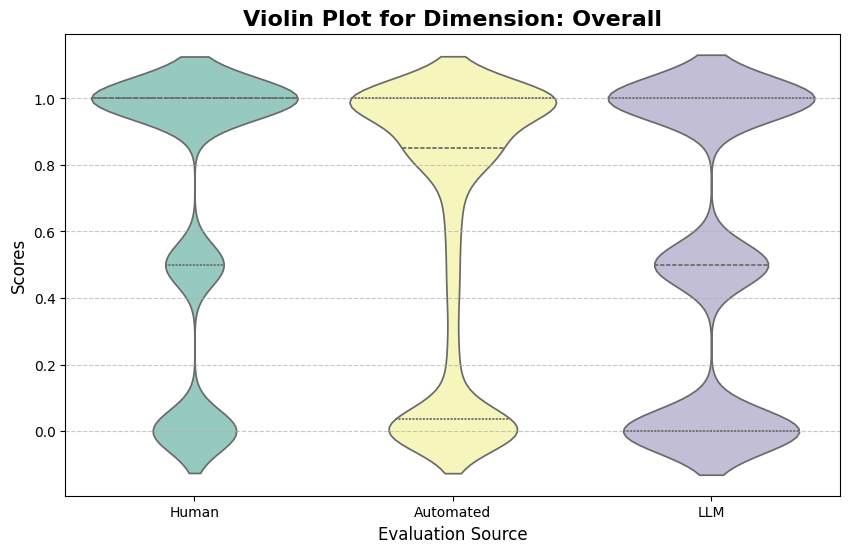

Violin plot successfully saved at: /home/kaushal.maurya/AITutor_AssessmentKit/outputs/label_distribution.png


In [22]:
visualizer.label_distribution_plot(dimension="Overall", normalize=True, plot_type='violin')

/home/kaushal.maurya/AITutor_AssessmentKit/aitutor_assessmentkit/visualizer/visualizer.py:291: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Source", y="Score", data=plot_df, palette="Set2")  # Create the boxplot


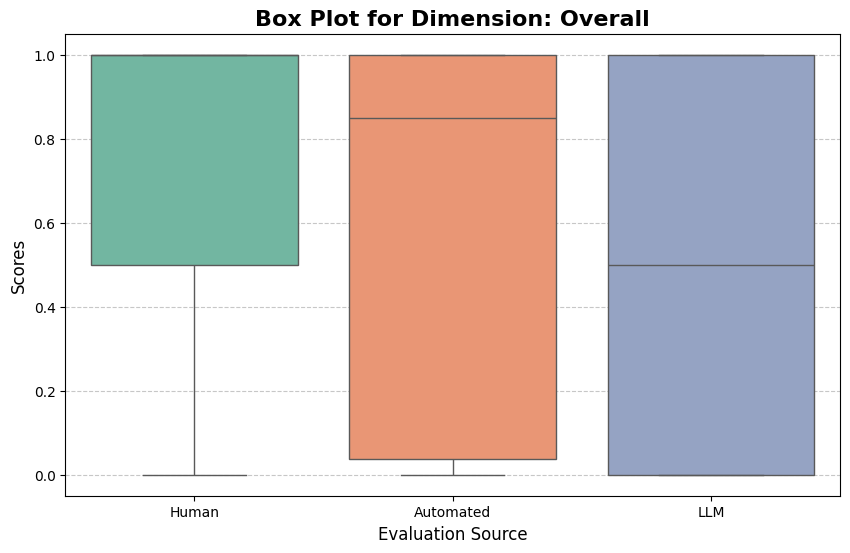

Box plot successfully saved at: /home/kaushal.maurya/AITutor_AssessmentKit/outputs/label_distribution.png


In [23]:
visualizer.label_distribution_plot(dimension="Overall", normalize=True, plot_type='box')

## Spider Plots to Compare the Evaluation Scores 

Spider plot saved at: /home/kaushal.maurya/AITutor_AssessmentKit/outputs/spider_plot.png


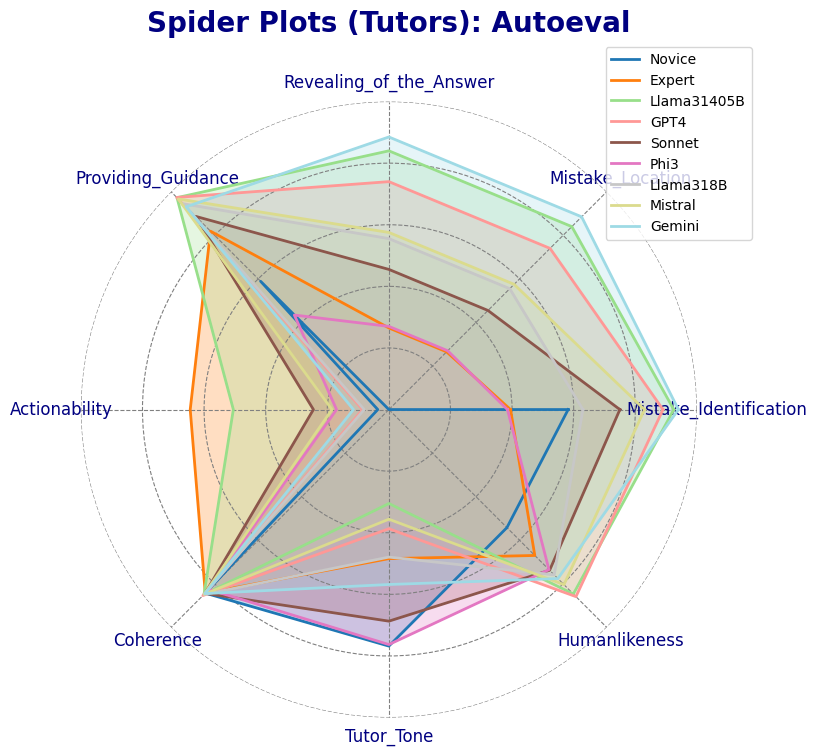

In [24]:
visualizer.spider_plot(normalize=True, evaluation_type='autoeval', plot_type="tutor")


Spider plot saved at: /home/kaushal.maurya/AITutor_AssessmentKit/outputs/spider_plot.png


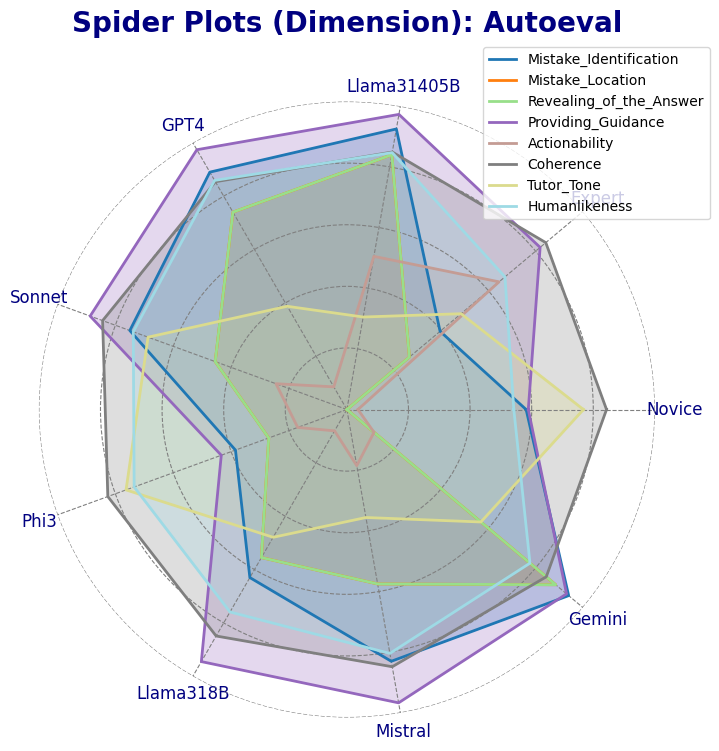

In [25]:
visualizer.spider_plot(normalize=True, evaluation_type='autoeval', plot_type="dimension")

Spider plot saved at: /home/kaushal.maurya/AITutor_AssessmentKit/outputs/compare_spider.png


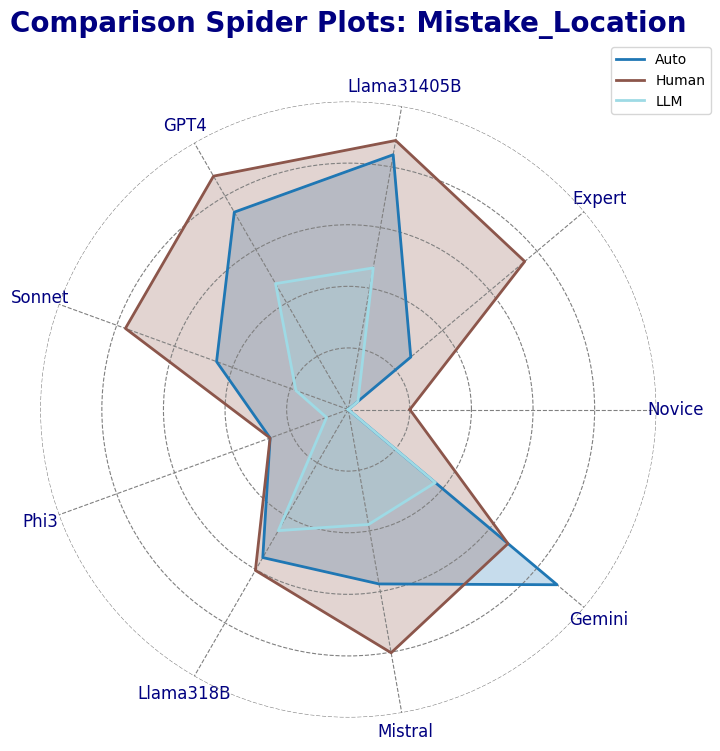

In [26]:
# Compare spider plots for a specific evaluation dimension
visualizer.compare_spider_plot(normalize=True, evaluation_dim='Mistake_Location')

### Generate interpretability plots
Interpretability plot bewtween discreate human evalution scores and continuous evalution scores


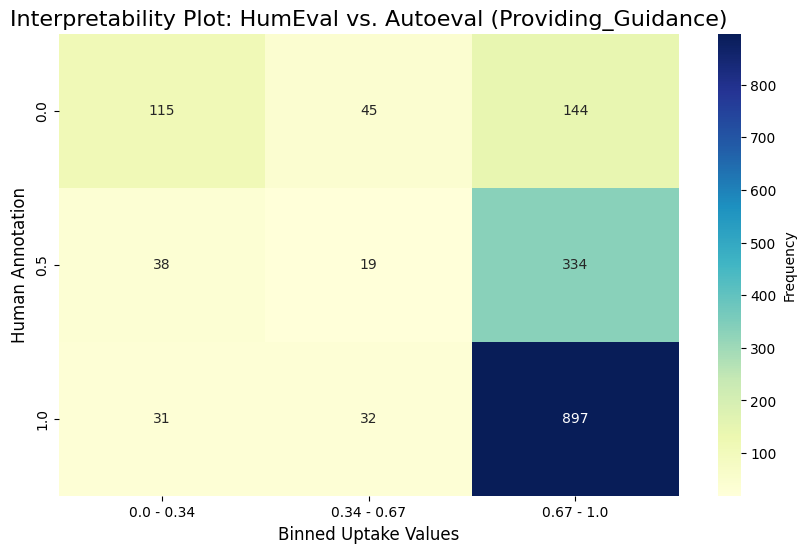

Plot saved at /home/kaushal.maurya/AITutor_AssessmentKit/outputs/interpretability_plot.png


<Figure size 640x480 with 0 Axes>

In [27]:
visualizer.interpretability_plot(normalize=True, bins=3, interpwith='autoeval', evaluation_dim='Providing_Guidance')

### Generate Performance Reports 

In [28]:
# Generate performance reports with metrics such as correlation or accuracy
overall, report = visualizer.peformance_report(normalize=True, metric="correlation",  correlation_with="autoeval")
print(overall)
report

0.234


,Tutor,Mistake_Identification,Mistake_Location,Revealing_of_the_Answer,Providing_Guidance,Actionability,Coherence,Tutor_Tone,Humanlikeness,Overall_tutors
0,Novice,-0.318,NaN,NaN,0.420,-0.097,0.265,0.585,-0.019,0.463
1,Expert,0.109,0.041,-0.005,0.165,0.396,0.072,0.294,0.178,0.259
2,Llama31405B,0.125,0.021,0.093,-0.065,0.285,-0.032,0.237,-0.056,0.099
3,GPT4,0.269,0.076,0.089,0.204,0.204,-0.014,0.109,0.023,0.224
4,Sonnet,0.141,0.205,0.134,0.185,0.348,-0.023,0.130,-0.070,0.163
5,Phi3,0.508,0.628,0.542,0.472,0.195,0.437,0.698,0.040,0.514
6,Llama318B,0.155,0.163,0.064,0.118,0.253,-0.111,0.167,-0.072,0.144
7,Mistral,0.258,0.106,0.149,0.028,0.146,-0.029,0.288,-0.021,0.136
8,Gemini,0.042,0.111,0.103,-0.029,0.244,-0.082,0.288,-0.123,-0.082
9,Overall_dim,0.333,0.279,0.175,0.319,0.330,0.195,0.361,0.084,0.234


In [29]:
overall, report = visualizer.peformance_report(normalize=True, metric="accuracy",  correlation_with="autoeval")
print(overall)
report

0.294


,Tutor,Mistake_Identification,Mistake_Location,Revealing_of_the_Answer,Providing_Guidance,Actionability,Coherence,Tutor_Tone,Humanlikeness,Overall_tutors
0,Novice,0.255,0.782,0.891,0.000,0.764,0.0,0.0,0.0,0.336
1,Expert,0.380,0.335,0.725,0.000,0.660,0.0,0.0,0.0,0.263
2,Llama31405B,0.900,0.740,0.300,0.000,0.585,0.0,0.0,0.0,0.316
3,GPT4,0.885,0.680,0.495,0.005,0.540,0.0,0.0,0.0,0.326
4,Sonnet,0.715,0.510,0.565,0.000,0.365,0.0,0.0,0.0,0.269
5,Phi3,0.760,0.840,0.810,0.000,0.780,0.0,0.0,0.0,0.399
6,Llama318B,0.605,0.540,0.475,0.000,0.455,0.0,0.0,0.0,0.259
7,Mistral,0.815,0.515,0.475,0.005,0.325,0.0,0.0,0.0,0.267
8,Gemini,0.840,0.615,0.175,0.000,0.305,0.0,0.0,0.0,0.242
9,Overall_dim,0.721,0.603,0.515,0.001,0.511,0.0,0.0,0.0,0.294


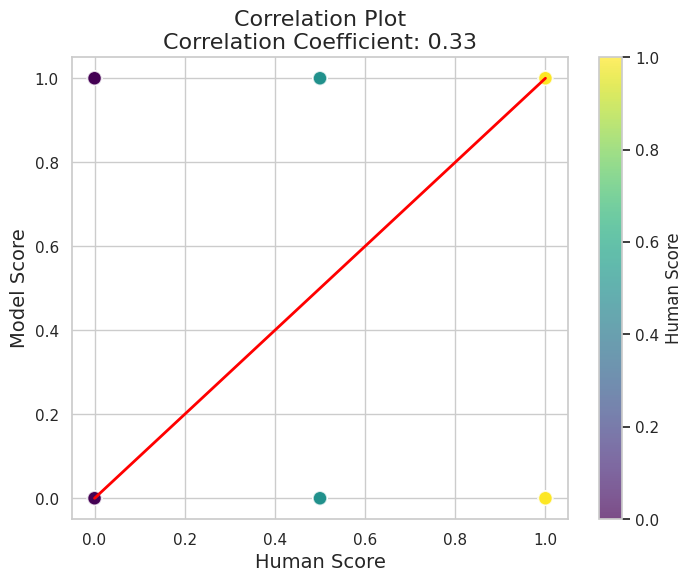

Correlation plot saved at: /home/kaushal.maurya/AITutor_AssessmentKit/outputs/correlation_plot.png


<Figure size 640x480 with 0 Axes>

In [30]:
# Generate correlation plots for specific evaluation dimensions
visualizer.plot_correlation(normalize=True, correlation_with="autoeval", 
                            dimension="Mistake_Identification", plot_name="correlation_plot.png")

### User Interaction Mode

In [31]:
# Interactive exploration of the evaluation data
visualizer.user_interaction(normalize=True)

Conversation Topic: 4.5A.Geometric Lines
Conversation History:
Tutor: examples: triangles, rectangles and pentagons. 
tutor: an obtuse angle is an angle that is more than 90 degrees. 
tutor: what is the name of a 5 sided polygon? 
student: a octogon

Available Tutors: ['Novice', 'Expert', 'Llama31405B', 'GPT4', 'Sonnet', 'Phi3', 'Llama318B', 'Mistral', 'Gemini']
Showing the next tutor response with GPT4
Next Tutor Response: good try, but a five-sided polygon is actually called a pentagon. an octagon is an eight-sided polygon. keep practicing, you're doing great!
LLM Evaluation:


,Mistake_Identification,Mistake_Location,Revealing_of_the_Answer,Providing_Guidance,Actionability,Humanlikeness,Coherence,Tutor_Tone
0,3,2,3,2,2,3,3,3


## **Conclusions and Next Steps**

Great! This concludes the short demo of `AITutor_AssessmentKit`. You can explore other resources here:

1. Code:  
2. Pip install link:  
3. Detailed tutorial on three modules:  

Future Steps:  
1. Create and release a detailed documentations.
2. Create and release a longer video.  
3. Make the interaction mode more GUI-friendly.  

![](/home/kaushal.maurya/AITutor_AssessmentKit/outputs/AITutor-assessmentKit-Main_vf3.png)